# Proyecto 17 - Analizar una Base de Datos de Perros

Hoy vamos a realizar un proyecto muy entretenido, que consiste en conseguir un dataset sobre razas de perros, que se encuentra alojada en el sitio [The Dog Api](https://thedogapi.com/).

Tu misión consiste en lograr obtener un dataset que contiene información sobre razas de perro ("breeds"), y crear visualizaciones que permitan responder algunas preguntas sobre la **expectativa de vida**, y el **temperamento** más frecuente entre todas las **razas**.


### Preguntas a responder
1. ¿Cuál es la esperanza de vida (en años) más frecuente entre todas las razas de perro?
2. ¿Cuál es el temperamento más frecuente entre todas las razas de perros?


### Pasos sugeridos para llegar hasta la respuesta
1. Descarga las **librerías** necesarias.
2. Explora el sitio [https://thedogapi.com/](https://thedogapi.com/) para identificar dónde y cómo se describe el funcionamiento de su API. Identifica la **API específica** con información sobre **razas** ("breeds"). Una vez que lo hagas, implementa la API y guarda esos datos en un **DataFrame** de Pandas.
*Nota: como todo sitio nuevo al que enfrentes, deberás resolver desafíos particulares. En este caso presta atención a las instrucciones que mencionan algo sobre cómo usar los mismos protocolos que se utilizan en la API de gatos de la misma organización*.
3. Realiza un **análisis exploratorio** para conocer la estrucutra y calidad de tus datos.
4. Implementa la **limpieza de datos** que consideres necesaria.
5. Crea los **gráficos** que creas necesarios para poder visualizar con claridad la respuesta a las preguntas.



### 1. Descargar las librerías

In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Implementar la API

In [2]:
# URL de la API de razas de perros
url = 'https://api.thedogapi.com/v1/breeds'

In [3]:
# Implementación de la API correspondiente
respuesta = requests.get(url)
data = respuesta.json()
df = pd.DataFrame(data)

### 3. Análisis Exploratorio de Datos

In [4]:
# Visualizamos el DataFrame generado
df.head()

,weight,height,id,name,bred_for,breed_group,life_span,temperament,origin,reference_image_id,country_code,description,history
0,"{'imperial': '6 - 13', 'metric': '3 - 6'}","{'imperial': '9 - 11.5', 'metric': '23 - 29'}",1,Affenpinscher,"Small rodent hunting, lapdog",Toy,10 - 12 years,"Stubborn, Curious, Playful, Adventurous, Activ...","Germany, France",BJa4kxc4X,NaN,NaN,NaN
1,"{'imperial': '50 - 60', 'metric': '23 - 27'}","{'imperial': '25 - 27', 'metric': '64 - 69'}",2,Afghan Hound,Coursing and hunting,Hound,10 - 13 years,"Aloof, Clownish, Dignified, Independent, Happy","Afghanistan, Iran, Pakistan",hMyT4CDXR,AG,NaN,NaN
2,"{'imperial': '44 - 66', 'metric': '20 - 30'}","{'imperial': '30', 'metric': '76'}",3,African Hunting Dog,A wild pack animal,NaN,11 years,"Wild, Hardworking, Dutiful",,rkiByec47,NaN,NaN,NaN
3,"{'imperial': '40 - 65', 'metric': '18 - 29'}","{'imperial': '21 - 23', 'metric': '53 - 58'}",4,Airedale Terrier,"Badger, otter hunting",Terrier,10 - 13 years,"Outgoing, Friendly, Alert, Confident, Intellig...","United Kingdom, England",1-7cgoZSh,NaN,NaN,NaN
4,"{'imperial': '90 - 120', 'metric': '41 - 54'}","{'imperial': '28 - 34', 'metric': '71 - 86'}",5,Akbash Dog,Sheep guarding,Working,10 - 12 years,"Loyal, Independent, Intelligent, Brave",,26pHT3Qk7,NaN,NaN,NaN


In [5]:
# Aplicamos info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   weight              172 non-null    object
 1   height              172 non-null    object
 2   id                  172 non-null    int64 
 3   name                172 non-null    object
 4   bred_for            151 non-null    object
 5   breed_group         156 non-null    object
 6   life_span           172 non-null    object
 7   temperament         168 non-null    object
 8   origin              5 non-null      object
 9   reference_image_id  172 non-null    object
 10  country_code        12 non-null     object
 11  description         1 non-null      object
 12  history             2 non-null      object
dtypes: int64(1), object(12)
memory usage: 17.6+ KB


In [6]:
# Aplicamos describe()
df.describe()

,id
count,172.000000
mean,125.505814
std,81.121200
min,1.000000
25%,53.750000
50%,120.500000
75%,201.750000
max,264.000000


### 4. Limpieza de Datos

In [7]:
# Indagamos respecto a los datos de la columna 'life_span', de interés
print(df['life_span'][2])
print(type(df['life_span'][2]))

11 years
<class 'str'>


In [8]:
# Realizamos un split de strings y adoptamos solamente el primer valor de esta columna
# Para ello definimos una lista vacía para ir comletando con un loop for; luego reemplazamos la columna life_span con esta lista

esperanza_vida = []

for valor in df['life_span']:
    numeros = int(valor.split()[0])
    esperanza_vida.append(numeros)

df['life_span'] = esperanza_vida

In [9]:
# Verificamos
print(df['life_span'][2])
print(type(df['life_span'][2]))

11
<class 'numpy.int64'>


In [10]:
# creamos un nuevo df con los datos de interés para todas las razas: 'life_span' y 'temperament'
columnas_int = ['life_span', 'temperament']
df = df[columnas_int]
df

,life_span,temperament
0,10,"Stubborn, Curious, Playful, Adventurous, Activ..."
1,10,"Aloof, Clownish, Dignified, Independent, Happy"
2,11,"Wild, Hardworking, Dutiful"
3,10,"Outgoing, Friendly, Alert, Confident, Intellig..."
4,10,"Loyal, Independent, Intelligent, Brave"
...,...,...
167,13,"Fearless, Friendly, Bold, Keen, Alert, Quick"
168,12,"Loyal, Gentle, Vigilant, Trainable, Proud"
169,12,NaN
170,12,"Cheerful, Alert, Companionable, Intelligent, P..."


### 5. Visualización de Datos

Text(0, 0.5, 'Frecuencia')

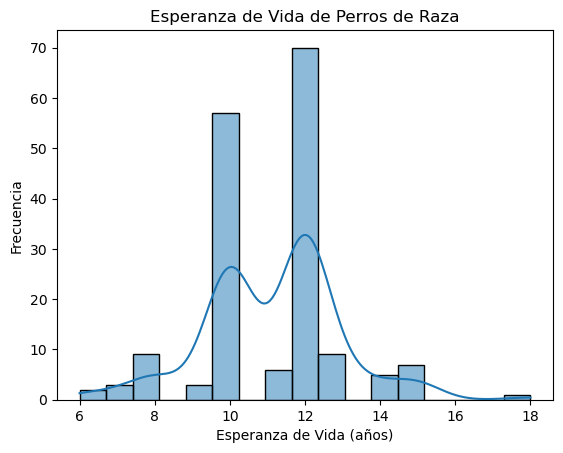

In [11]:
# Representamos la frecuencia de la esperanza de vida con un histograma
sns.histplot(data=df,
             x=df['life_span'],
             kde=True,
             )
plt.title('Esperanza de Vida de Perros de Raza')
plt.xlabel('Esperanza de Vida (años)')
plt.ylabel('Frecuencia')

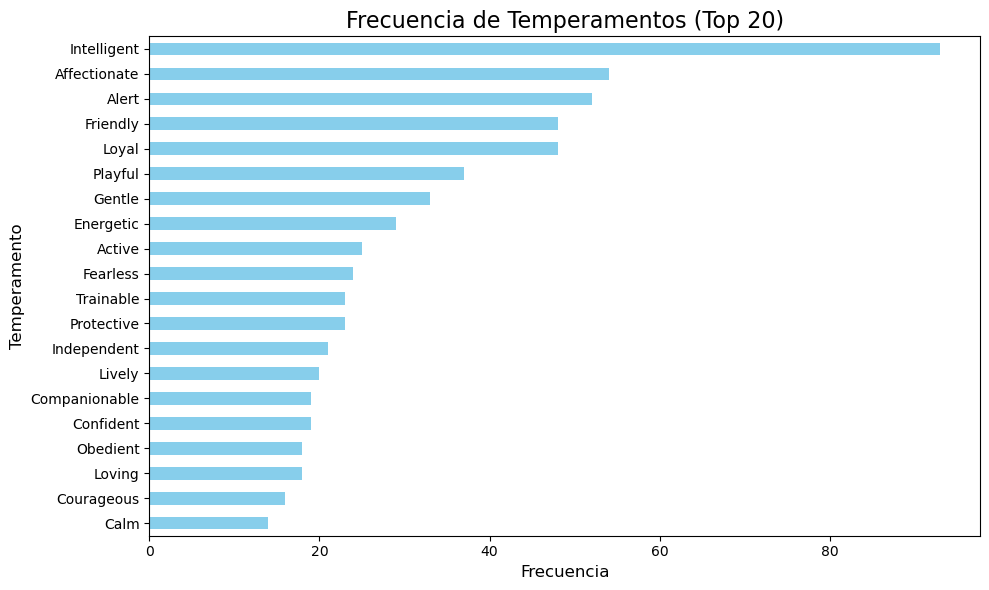

In [12]:
# Separar los valores de la columna 'temperament' en listas
df['temperament'] = df['temperament'].str.split(", ")

# Expandir la lista en múltiples filas y eliminar NaN
temperaments_expanded = df['temperament'].explode().dropna()

# Contar la frecuencia de cada temperamento
temperament_counts = temperaments_expanded.value_counts()

# Seleccionar los primeros 20 temperamentos más frecuentes
top_20_temperaments = temperament_counts.head(20)

# Graficar los temperamentos más frecuentes en horizontal, con mayor frecuencia arriba
plt.figure(figsize=(10, 6))
top_20_temperaments.sort_values().plot(kind='barh', color='skyblue')
plt.title('Frecuencia de Temperamentos (Top 20)', fontsize=16)
plt.xlabel('Frecuencia', fontsize=12)
plt.ylabel('Temperamento', fontsize=12)
plt.tight_layout()
plt.show()

### Respuestas

1. ¿Cuál es la esperanza de vida (en años) más frecuente entre todas las razas de perro?

    **Respuesta:** 12 años

2. ¿Cuál es el temperamento más frecuente entre todas las razas de perros?

    **Respuesta:** Inteligencia